In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("dataset3.csv")
df = df.drop('Unnamed: 0', axis=1)

df.head()

,price,stock,sigma,strike,maturity,initial_vol,interest_rates
0,0.606929,1.950446,0.4,1.6,1.5,0.01,0.0
1,0.260689,1.955489,0.4,1.6,1.5,0.01,0.0
2,0.767140,2.011468,0.4,1.6,1.5,0.01,0.0
3,0.000000,1.944309,0.4,1.6,1.5,0.01,0.0
4,0.724197,2.025303,0.4,1.6,1.5,0.01,0.0


## Classification

In [3]:
df['exercise'] = df.price!=0
df = df.drop(['price', 'interest_rates'], axis=1)
df.head()

,stock,sigma,strike,maturity,initial_vol,exercise
0,1.950446,0.4,1.6,1.5,0.01,True
1,1.955489,0.4,1.6,1.5,0.01,True
2,2.011468,0.4,1.6,1.5,0.01,True
3,1.944309,0.4,1.6,1.5,0.01,False
4,2.025303,0.4,1.6,1.5,0.01,True


In [4]:
df.groupby('exercise').count().stock

exercise
False    32815
True     63185
Name: stock, dtype: int64

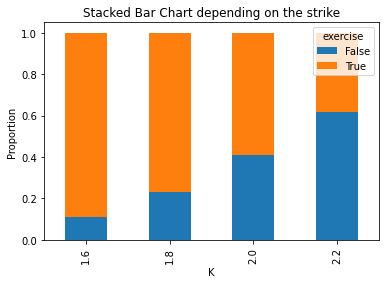

In [5]:
table = pd.crosstab(df.strike, df.exercise)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart depending on the strike')
plt.xlabel('K')
plt.ylabel('Proportion')
plt.savefig('e_vs_ne_strike')

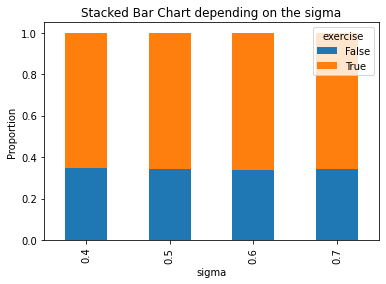

In [6]:
table = pd.crosstab(df.sigma, df.exercise)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart depending on the sigma')
plt.xlabel('sigma')
plt.ylabel('Proportion')
plt.savefig('e_vs_ne_strike')

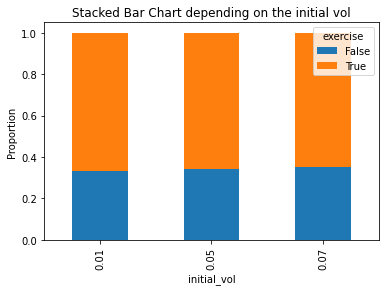

In [7]:
table = pd.crosstab(df.initial_vol, df.exercise)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart depending on the initial vol')
plt.xlabel('initial_vol')
plt.ylabel('Proportion')
plt.savefig('e_vs_ne_initial_vole')

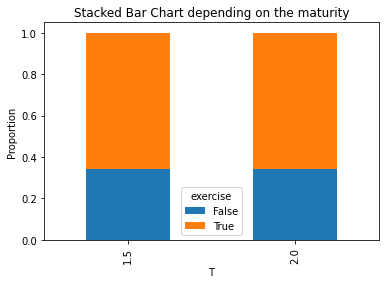

In [8]:
table = pd.crosstab(df.maturity, df.exercise)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart depending on the maturity')
plt.xlabel('T')
plt.ylabel('Proportion')
plt.savefig('e_vs_ne_strike')

In [9]:
# plot function confusion matrix

from sklearn.metrics import confusion_matrix
def plot_confusion_matrix (confusion_matrix, title):

    ax = plt.subplot()
    sns.heatmap(confusion_matrix,annot=True,fmt = "d",square = True,ax = ax, linewidths = 1, linecolor = "w", cmap = "Pastel2")
    ax.set_xlabel('True labels')
    ax.set_ylabel('Predicted labels')
    ax.xaxis.set_ticklabels(['Exercised','Not Exercised'])
    ax.yaxis.set_ticklabels(['Exercised','Not Exercised'], va="center")
    plt.title(title)
    plt.show()

In [10]:
# plot function roc curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(X_test, y_test, y_pred, model, title):
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    titlee = 'Exercise ROC curve ' + title
    plt.title(titlee)
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [11]:
X = df.drop('exercise', axis = 1)
y = df['exercise']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Logistic Regression

In [12]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.547108
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.148      
Dependent Variable: exercise         AIC:              105054.7776
Date:               2020-12-06 22:24 BIC:              105102.1381
No. Observations:   96000            Log-Likelihood:   -52522.    
Df Model:           4                LL-Null:          -61655.    
Df Residuals:       95995            LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
stock         4.5032    0.0456    98.6551  0.0000   4.4137   4.5927
sigma         0.1618    0.0663     2.4407  0.0147

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = logreg.predict(X_test)

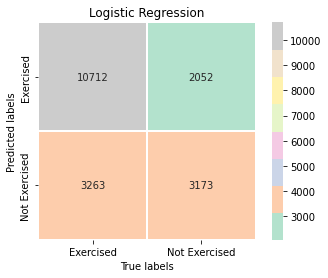

In [15]:
confusion_matrix_logistic = confusion_matrix(y_test, y_pred, labels=[True, False])
plot_confusion_matrix (confusion_matrix_logistic, 'Logistic Regression')

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.59      0.41      0.48     16421
        True       0.74      0.85      0.79     31579

    accuracy                           0.70     48000
   macro avg       0.66      0.63      0.64     48000
weighted avg       0.69      0.70      0.68     48000



In [57]:
print('Accuracy logistic regression classifier: {:.2f}%'.format(logreg.score(X_test, y_test)*100))

Accuracy logistic regression classifier: 69.91%


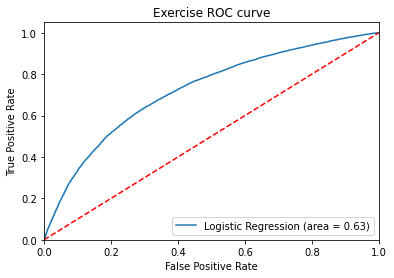

In [36]:
plot_roc_curve(X_test, y_test, y_pred, logreg)

## KNN

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

Neighbor_List=[3,5,10,20]
parameters = {'n_neighbors':Neighbor_List}
KNNC = KNeighborsClassifier()
classifier_knn = GridSearchCV(KNNC, parameters, cv=5, verbose=0, scoring ='accuracy')

classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)

In [61]:
print('Accuracy KNN: {:.2f}%'.format(logreg.score(X_test, y_test)*100))

Accuracy KNN: 70.03%


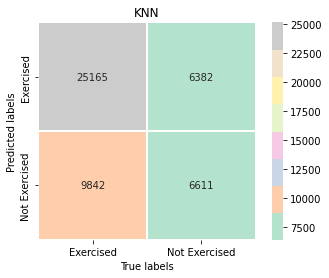

In [62]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred, labels=[True, False])
plot_confusion_matrix (confusion_matrix_knn, 'KNN')

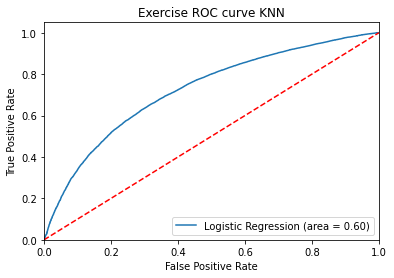

In [63]:
plot_roc_curve(X_test, y_test, y_pred, classifier_knn, 'KNN')

## XGBoost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from xgboost import XGBClassifier

params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [2, 3, 6],
    'learning_rate': [0.005, 0.01, 0.02],
    'subsample': [0.4, 0.6, 0.8]
}
classifier_xgboost = GridSearchCV(XGBClassifier(random_state=10), params, scoring ='accuracy')
classifier_xgboost.fit(X_train, y_train)

In [ ]:
y_pred = classifier_xgboost.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy XGBoost: %.2f%%" % (accuracy * 100.0))

In [ ]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred, labels=[True, False])
plot_confusion_matrix (confusion_matrix_knn, 'XGBoost')

In [ ]:
plot_roc_curve(X_test, y_test, y_pred, classifier_xgboost, 'XGBoost')

In [ ]:
# feature importance

clf= classifier_xgboost(learning_rate= 0.005, max_depth= 2, n_estimators= 100, subsample= 0.6,random_state=10)
clf.fit(X_train, y_train)
features = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), [features[i] for i in indices])
plt.xticks(rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()